In [135]:
%%capture
%run bg_functions.py

# Modules import
import math

- Plotear Newton-Rapshon
- Documentar métodos de ploteo.
- Tarea: A través de estos métodos encontrar la raiz n-ecima de ese número. (Por ejemplo, el # de cédula)
- Arreglar en UBC Math del método de la secante: La numeración de los pasos no es correcta.

<center><h1> Métodos de un único punto </h1></center>

<h3><span style="color:#005cb9">Método del punto fijo</span></h3>

Este método no es para hallar raíces $f(x)=0$; es para hallar puntos fijos (i.e. dónde la función $f(x)$ intercepta a la recta $y = x$)

**Pasos a seguir:**

1. <p style="text-align:left;">Igualar la función a 0:</p><p style="text-align:center;">$f(x) = 0$ </p>
2. <p style="text-align:left;">Despejar $x$ de la ecuación:</p><p style="text-align:center;">$x = g(x)$</p>
3. <p style="text-align:left;">Condición necesaria para que el método funcione:</p><p style="text-align:center;">$|g'(x)| < 1$</p>
4. <p style="text-align:left;">Se selecciona un valor $X_{o}$ que al evaluarse en $f(x)$ se aproxime a 0.</p>
5. <p style="text-align:left;">Se itera $X_{i}$ en $g(X_{i})$, el resultado será $X_{i+1}$</p>
6. <p style="text-align:left;">Se parará hasta que el error absoluto sea de $1x10^{-6}$</p>

In [93]:
def fixed_point(func, x0, N):
    '''
    Fixed point iteration.

    Parameters
    ----------
    func : function
        The function for which we are trying to find the fixed point.
    x0 : number (float)
        Initial value.
    N : (positive) integer
        The number of iterations to implement.
    
    Dependencies
    ------------
    - from bg_functions import _lazywhere
    - from bg_functions import _del2
    - from bg_functions import _relerr
    
    Returns
    -------
    x : number
        The fixed point approximation.
    Xi : list
        A list containign all the solutions for every step of the iteration.
    
    Explanation
    -----------
    While the maximum number of iterations hasn't been reached compute two (2)
    points ahead and use the Steffensen's Method with Aitken's ``Del^2``
    convergence acceleration [1]. Compute the relative error 'relerr' and if
    it's smaller than the default error (1e-8) then the approximation is pretty
    good, cast the 'p' variable from an array to a float number and return the
    fixed point 'p' and an array 'Xi' with the solutions for each step; otherwise
    repeat. Append the result to the list 'Xi'. In case a result hadn't been
    found after the maximum number of iterations then throw a RuntimeError.
    
    References
    ----------
    [1] Burden, Faires, "Numerical Analysis", 5th edition, pg. 80
    
    Credits
    ----------
    This code was taken from the 'scipy optimize library' and then modified.
    Much love to the creators.
    
    Examples
    --------
    >>> func = lambda x: x**2-3*x+2
    >>> solution, Xi = fixed_point(func, 0, 50)
    La solución es: 0.585786437626905
    '''
    Xi = []
    p0 = x0
    for i in range(N):
        p1 = func(p0)
        p2 = func(p1)
        d = p2 - 2.0 * p1 + p0
        p = _lazywhere(d != 0, (p0, p1, d), f=_del2, fillvalue=p2)
        relerr = _lazywhere(p0 != 0, (p, p0), f=_relerr, fillvalue=p)
        if np.all(np.abs(relerr) < MAX_ERROR):
            p = float(p)
            print ("La solución es:", p)
            return p, Xi
        p0 = p
        Xi.append(p0)
    msg = "Failed to converge after %d iterations, value is %s" % (N, p)
    raise RuntimeError(msg)

#### Ejemplo de uso del algoritmo

In [102]:
func = lambda x : math.sqrt(x)
x0 = 0.5

solution, Xi = fixed_point(func, x0, 50)
tabs = singlepoint_table(func, Xi, x0, "fixed_point")
tabs

La solución es: 1.0000000000000007


,Xi,F(xi),Error
0,1.085037,1.041651,4.338573e-02
1,1.000808,1.000404,4.041955e-04
2,1.000000,1.000000,4.078169e-08


#### Gráfica del método

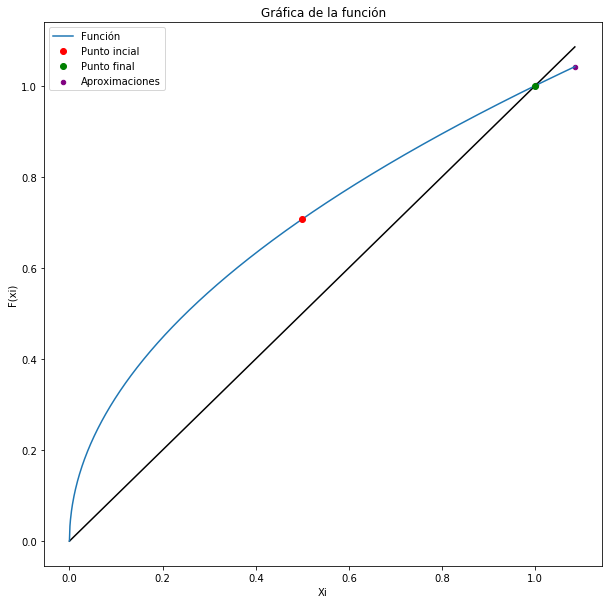

In [103]:
fixed_point_plot(func, tabs, x0, solution)

<h3><span style="color:#005cb9">Método de Newton-Rapshon</span></h3>

El método de Newton-Raphson es una forma de hallar rapidamente una buena aproximación para la raíz de la función real 
$f(X) = 0$. Se basa en el suspuesto que una función continua y diferenciable se puede aproximar by una línea recta tangente a la función.

**Pasos a seguir:**

1. <p style="text-align:left;">Igualar la función a 0:</p><p style="text-align:center;">$f(x) = 0$ </p>
2. <p style="text-align:left;">Despejar $x$ de la ecuación:</p><p style="text-align:center;">$x = g(x)$</p>
3. <p style="text-align:left;">Aplicar la formula de aproximación: </p><p style="text-align:center;">$x_{i+1} = x_{i} - \frac{f(x)}{f'(x)}$</p>

**Desventajas**

- Es posible que el método _no funcione_ si existen puntos de inflexión, mínimos y/o máximos locales cerca del punto inicial.
- Para este método es necesario calcular la derivada de la función en cuestión, de modo que si ésta es díficil de calcular se puede volver un poco tedioso.

In [104]:
def newton_raphson(f, Df, x0, N):
    '''
    Approximate solution of f(x)=0 by Newton-Rapshon method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x) = 0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x) = 0.
    N : integer
        Maximum number of iterations of Newton-Rapshon method.
    
    Returns
    -------
    xn : number
        The solution.
    Xi : list
        This list contains every iteration of the process, this is done in 
        order to later build a table.

    
    Explanation
    -----------
        Compute the linear approximation of f(x) at xn and find x intercept
        by the formula x = xn - f(xn)/Df(xn). Continue until
        abs(f(xn)) < MAX_ERROR and return xn and Xi (a list containing every
        iteration). If Df(xn) == 0, return None. If the number of iterations
        exceeds N, then return None.
    
    Credits
    -------
    The algorithm was taken from the Mathematical Python course page by
    the University of British Columbia. It was later modified.
    So much love to them.
    
    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> solution, Xi = newton_raphson(f, Df, 1, 1e-8, 10)
    La solución es: 1.618033988749989
    '''
    Xi = []
    xn = x0
    for n in range(0, N):
        fxn = f(xn)
        if abs(fxn) < MAX_ERROR:
            print ("La solución es:", xn)
            return xn, Xi
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
        Xi.append(xn)
    print('Exceeded maximum iterations. No solution found.')
    return None

#### Ejemplo de uso del algoritmo

In [105]:
func2 = lambda x: x**2 - x - 1
Df2 = lambda x: 2*x - 1

sol2, X2 = newton_raphson(func2, Df2, 1, 10)
tabs2 = singlepoint_table(func2, X2, 1, "newton_raphson")
tabs2

La solución es: -1.0


,Xi,F(xi),Error
0,1.0,-1.0,0.0


<center><h1> Métodos de dos (2) puntos </h1></center>

<h3><span style="color:#005cb9">Método de la secante</span></h3>

Este método divide los intervalos mediante la línea secante que conecta los puntos limites.

**Pasos a seguir:**

1. Escoja un intervalo inicial $[a_{0}, b_{0}]$, de modo que $f(a_{0})*f(b_{0}) < 0$
2. <p style="text-align:left;">Calcule el valor de la función en el punto inicial, mediante la expresión:</p><p style="text-align:center;">$x_{0} = a_{0} - f(a_{0})\frac{b_{0} - a_{0}}{f(b_{0}) - f(a_{0})}$ </p>
3. Determine el siguiente sub-intervalo $[a_{1},b_{1}]$:

    **A.** Si $f(a_{0})*f(x_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = a_{0}$ y $b_{1} = x_{0}$
    
    **B.** Si $f(b_{0})*f(x_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = x_{0}$ y $b_{1} = b_{0}$
    
    
4. Repite las pasos *2.* y *3.* hasta que el intervalo $[a_{N}, b_{N}]$ alcance una longitud predeterminada.
5. Devuelva el valor $x_{N}$, el intercepto con el eje 'x' del N-avo intervalo.

**Criterio de convergencia**

Este método siempre convergerá a una raíz de $f(x) = 0$ siempre y cuando $f(x)$ sea continua en el intervalo $[a, b]$ y que $f(a)*f(b) < 0$ (en otras palabras, que la función cambie de signo en algún punto durante el intervalo.)

In [112]:
def secant(f, a, b, N):
    '''
    Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a, b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    m_N : number
        The x intercept of the secant line on the the Nth interval
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
    Xi : list
        This list contains every iteration of the process, this is done in 
        order to later build a table.
    error : list
        A list containing the absolute error value of each iteration.

    
    Explanation
    -----------
    The initial interval [a_0, b_0] is given by [a,b]. If f(m_n) == 0
    for some intercept m_n then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iterations, the secant method fails and return None. It'll append
    to 'Xi' every iteration.
    
    Credits
    -------
    The algorithm was taken from the Mathematical Python course page by
    the University of British Columbia. It was later modified.
    So much love to them.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> solution, Xi, error = secant(f, 1, 2, 5)
    La mejor aproximación es: 1.6180257510729614
    '''
    if f(a)*f(b) >= 0:
        print("Secant method fails. There's no intercept with x-axis.")
        return None
    a_n = a
    b_n = b
    Xi = []
    error = []
    for n in range(1, N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        Xi.append(m_n)
        error.append(f_m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n, Xi, error
        else:
            print("Secant method fails.")
            return None
    aprox = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
    print("La mejor aproximación es: ", aprox)
    return aprox, Xi, error

#### Ejemplo de uso del algoritmo

In [137]:
func3 = lambda x: x**2 - x - 1
A3, B3 = 1, 2

sol3, Xi3, error3 = secant(func3, A3, B3, 10)
tabs3 = doublepoint_table(func3, Xi3, error3)
tabs3

La mejor aproximación es:  1.6180339882053252


,Xi,F(xi),Error
0,1.500000,1.750000,-2.500000e-01
1,1.600000,1.640000,-4.000000e-02
2,1.615385,1.621302,-5.917160e-03
3,1.617647,1.618512,-8.650519e-04
4,1.617978,1.618104,-1.262467e-04
5,1.618026,1.618044,-1.841994e-05
6,1.618033,1.618035,-2.687450e-06
7,1.618034,1.618034,-3.920940e-07
8,1.618034,1.618034,-5.720575e-08
9,1.618034,1.618034,-8.346206e-09


#### Gráfica del método

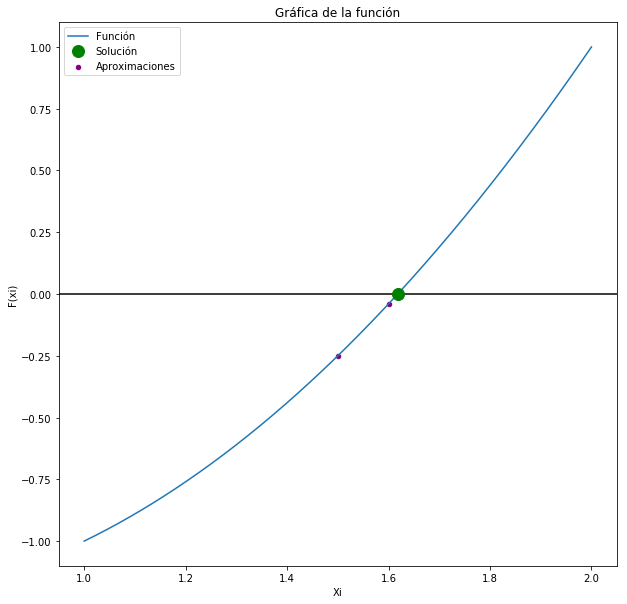

In [138]:
doublepoint_plot(func3, tabs3, A3, B3, sol3)

<h3><span style="color:#005cb9">Método de bisección</span></h3>

Similar al método de la secante, este método divide los intervalos por medio del punto medio entre los puntos limites.

**Pasos a seguir:**

1. Escoja un intervalo inicial $[a_{0}, b_{0}]$, de modo que $f(a_{0})*f(b_{0}) < 0$
2. <p style="text-align:left;">Calcule $f(m_{0})$, donde $f(m_{0}) = \frac{a_{0} + b_{0}}{2}$ es el punto medio.
3. Determine el siguiente sub-intervalo $[a_{1},b_{1}]$:

    **A.** Si $f(a_{0})*f(m_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = a_{0}$ y $b_{1} = m_{0}$
    
    **B.** Si $f(b_{0})*f(m_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = m_{0}$ y $b_{1} = b_{0}$
    
    
4. Repite las pasos *2.* y *3.* hasta que el intervalo $[a_{N}, b_{N}]$ alcance una longitud predeterminada.
5. Devuelva el valor medio $m_{0} = \frac{a_{N} + b_{N}}{2}$.

**Criterio de convergencia**

Este método siempre convergerá a una raíz de $f(x) = 0$ siempre y cuando $f(x)$ sea continua en el intervalo $[a, b]$ y que $f(a)*f(b) < 0$ (en otras palabras, que la función cambie de signo en algún punto durante el intervalo.)

En general, este método no da una solución exacta, de modo que es necesario tener muy en cuenta el error.

In [139]:
def bisection(f, a, b, N):
    '''
    Approximate solution of f(x)=0 on interval [a,b] by the bisection method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a, b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The midpoint of the Nth interval computed by the bisection method.
    Xi : list
        This list contains every iteration of the process, this is done in 
        order to later build a table.
    error : list
        A list containing the absolute error value of each iteration.
        
    Explanation
    -----------
    
    The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iteration, the bisection method fails and return None. Save the error and
    the result of each iteration in 'error' and 'Xi', respectively.

    Credits
    -------
    The algorithm was taken from the Mathematical Python course page by
    the University of British Columbia. It was later modified.
    So much love to them.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> solution, Xi, error = bisection(f, 1, 2, 25)
    La mejor aproximación es: 1.618033990263939
    '''
    if f(a)*f(b) >= 0:
        print("Bisection method fails. There's not intercept with the x-axis.")
        return None
    a_n = a
    b_n = b
    Xi = []
    error = []
    for n in range(1, N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        Xi.append(m_n)
        error.append(f_m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n, Xi, error
        else:
            print("Bisection method fails.")
            return None
    aprox = (a_n + b_n)/2
    print("La mejor aproximación es: ", aprox)
    return aprox, Xi, error

In [140]:
func4 = lambda x: x**2 - x - 1
A4, B4 = 1, 2

sol4, Xi4, error4 = bisection(func4, 1, 2, 10)
tabs4 = doublepoint_table(func4, Xi4, error4)
tabs4

La mejor aproximación es:  1.61767578125


,Xi,F(xi),Error
0,1.500000,1.750000,-0.250000
1,1.750000,2.062500,0.312500
2,1.625000,1.640625,0.015625
3,1.562500,1.683594,-0.121094
4,1.593750,1.647461,-0.053711
5,1.609375,1.628662,-0.019287
6,1.617188,1.619080,-0.001892
7,1.621094,1.627945,0.006851
8,1.619141,1.621616,0.002476
9,1.618164,1.618455,0.000291


#### Gráfica del método

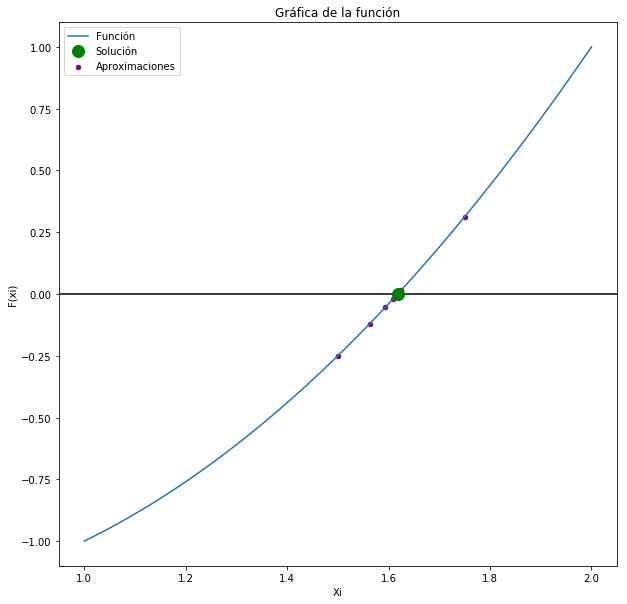

In [141]:
doublepoint_plot(func4, tabs4, A4, B4, sol4)

<h3><span style="color:#005cb9">Método de la posición falsa (Regula Falsi)</span></h3>

Similar a los métodos de bisección y de la secante.

**Pasos a seguir:**

1. Escoja un intervalo inicial $[a_{0}, b_{0}]$, de modo que $f(a_{0})*f(b_{0}) < 0$
2. <p style="text-align:left;">Calcule $f(m_{0})$, donde $f(m_{0}) = \frac{b_{0}*f(a_{0}) - a_{0}*f(b_{0})}{f(a_{0}) - f(b_{0})}$ es el punto medio.
3. Determine el siguiente sub-intervalo $[a_{1},b_{1}]$:

    **A.** Si $f(a_{0})*f(m_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = a_{0}$ y $b_{1} = m_{0}$
    
    **B.** Si $f(b_{0})*f(m_{0}) < 0$, entonces el siguiente intervalo será $[a_{1}, b_{1}]$ donde $a_{1} = m_{0}$ y $b_{1} = b_{0}$
    
    
4. Repite las pasos *2.* y *3.* hasta que el intervalo $[a_{N}, b_{N}]$ alcance una longitud predeterminada.
5. Devuelva el valor medio $f(m_{0})$, donde $f(m_{0}) = \frac{b_{0}*f(a_{0}) - a_{0}*f(b_{0})}{f(a_{0}) - f(b_{0})}$.

**Criterio de convergencia**

Este método siempre convergerá a una raíz de $f(x) = 0$ siempre y cuando $f(x)$ sea continua en el intervalo $[a, b]$ y que $f(a)*f(b) < 0$ (en otras palabras, que la función cambie de signo en algún punto durante el intervalo.)

En general, este método no da una solución exacta, de modo que es necesario tener muy en cuenta el error.

In [145]:
def regula_falsi(f, a, b, N):
    '''
    Approximate solution of f(x)=0 on interval [a,b] by the Regula Falsi method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a, b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The 'false position' of the Nth interval computed by the Regula Falsi method.
    Xi : list
        This list contains every iteration of the process, this is done in 
        order to later build a table.
    error : list
        A list containing the absolute error value of each iteration.
        
    Explanation
    -----------
    
    The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iteration, the bisection method fails and return None. Save the error and
    the result of each iteration in 'error' and 'Xi', respectively.

    Credits
    -------
    This algorithm is my own creation; although it follows the same structure of
    the bisection and secant methods, which were taken from the Mathematical Python
    course page by the University of British Columbia.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> solution, Xi, error = regula_falsi(f, 1, 2, 25)
    La mejor aproximación es: 1.809016992508679
    '''
    if f(a)*f(b) >= 0:
        print("Regula Falsi method fails. There's not intercept with the x-axis.")
        return None
    a_n = a
    b_n = b
    Xi = []
    error = []
    for n in range(1, N+1):
        m_n = (b_n*f(a_n) - a_n*f(b_n))/(f(a_n)-f(b_n))
        f_m_n = f(m_n)
        Xi.append(m_n)
        error.append(f_m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n, Xi, error
        else:
            print("Regula Falsi method fails.")
            return None
    aprox = (b_n*f(a_n) - a_n*f(b_n))/(f(a_n)-f(b_n))
    print("La mejor aproximación es: ", aprox)
    return aprox, Xi, error

In [146]:
func5 = lambda x: x**2 - x - 1
A5, B5 = 1, 2

sol5, Xi5, error5 = regula_falsi(func5, A5, B5, 10)
tabs5 = doublepoint_table(func5, Xi5, error5)
tabs5

La mejor aproximación es:  1.6180339882053252


,Xi,F(xi),Error
0,1.500000,1.750000,-2.500000e-01
1,1.600000,1.640000,-4.000000e-02
2,1.615385,1.621302,-5.917160e-03
3,1.617647,1.618512,-8.650519e-04
4,1.617978,1.618104,-1.262467e-04
5,1.618026,1.618044,-1.841994e-05
6,1.618033,1.618035,-2.687450e-06
7,1.618034,1.618034,-3.920940e-07
8,1.618034,1.618034,-5.720575e-08
9,1.618034,1.618034,-8.346206e-09


#### Gráfica del método

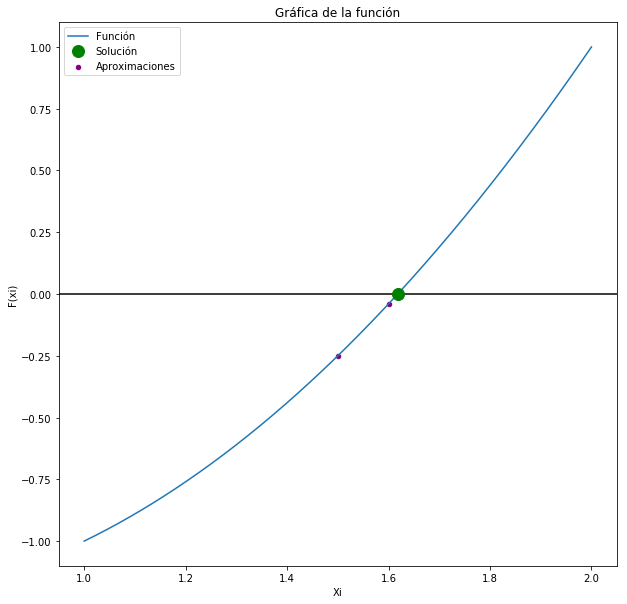

In [147]:
doublepoint_plot(func5, tabs5, A5, B5, sol5)